# Title

## Main Objective

### Identify Key Drivers of Traffic Safety
* Use dimensionality reduction PCA to identify the features that have the most variance and influence safety indices.
### Monitor Regional Safety Evolution Over Time
* Group data by region ("Entidad") and year ("Año").
* Apply clustering (K-Means and others) to group regions based on safety indices.  
  Combine clustering results with temporal data to observe how cluster assignments change over time.

## Dataset Description

This dataset was obtained from the open data page of Gobierno de México since it was sourced as a PDF's it was extracted in the DataExtraction Notebook that can be accessed trough the following link:  
*   https://github.com/Arniquin/ClusteringTrafficData  

##### Dataset Source:  
The dataset contains accidents statistics and geographic information per state in Mexico from the year 2018 to 2022.  
* https://datos.gob.mx/busca/dataset/estadistica-de-accidentes-de-transito

### Dataset Features Description

1. **Entidad**: Administrative region or state.  
   *Type*: Categorical. Example: "Mexico City."

2. **Superficie**: Region's area in square kilometers (km²).  
   *Type*: Numerical. Example: 1256.7.

3. **Habitantes**: Total population.  
   *Type*: Numerical. Example: 123456.

4. **Hombres**: Male population.  
   *Type*: Numerical. Example: 60000.

5. **Mujeres**: Female population.  
   *Type*: Numerical. Example: 63500.

6. **Densidad de población**: Population density (persons/km²).  
   *Type*: Numerical. Example: 120.5.

7. **Vehículos registrados**: Registered vehicles.  
   *Type*: Numerical. Example: 45678.

8. **Habitantes por vehículo**: Average inhabitants per vehicle.  
   *Type*: Numerical. Example: 3.5.

9. **Índice de motorización**: Vehicles per 1000 inhabitants.  
   *Type*: Numerical. Example: 280.7.

10. **Longitud del camino (km)**: Road length in kilometers (km).  
    *Type*: Numerical. Example: 150.0.

11. **Veh-km (millones)**: Vehicle kilometers traveled (millions).  
    *Type*: Numerical. Example: 45.6.

12. **Accidentes Totales**: Total traffic accidents reported.  
    *Type*: Numerical. Example: 2000.

13. **Accidentes Con muertos**: Traffic accidents with fatalities.  
    *Type*: Numerical. Example: 45.

14. **Accidentes Solo con heridos**: Traffic accidents causing injuries only.  
    *Type*: Numerical. Example: 300.

15. **Accidentes Equivalentes**: Weighted accident count considering severity.  
    *Type*: Numerical. Example: 500.5.

16. **Saldos Muertos**: Total fatalities from traffic accidents.  
    *Type*: Numerical. Example: 100.

17. **Saldos Heridos**: Total injuries from traffic accidents.  
    *Type*: Numerical. Example: 500.

18. **Daños materiales (millones)**: Material damages caused by accidents (millions).  
    *Type*: Numerical. Example: 12.5.

19. **Índices Accidentes por 10⁶ de Veh-km**: Accidents per million vehicle kilometers.  
    *Type*: Numerical. Example: 3.5.

20. **Índices Peligrosidad por 10⁵ de Veh-km**: Danger index per 100,000 vehicle kilometers.  
    *Type*: Numerical. Example: 2.1.

21. **Índices Accidentes mortales por 10⁵ de Veh-km**: Fatal accidents per 100,000 vehicle kilometers.  
    *Type*: Numerical. Example: 0.15.

22. **Índices Muertos por 10⁵ de Veh-km**: Fatalities per 100,000 vehicle kilometers.  
    *Type*: Numerical. Example: 0.25.

23. **Índices Heridos por 10⁵ de Veh-km**: Injuries per 100,000 vehicle kilometers.  
    *Type*: Numerical. Example: 1.8.

24. **Año**: Year of data observation.  
    *Type*: Temporal. Example: 2020.


#### Necesary libraries installation and importation

In [99]:
# Installing the necessary libraries
%pip install pandas scikit-learn seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [148]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

### Loading the dataset using pandas read_csv function

In [101]:
df = pd.read_csv("./data/accidentes.csv")
df.head()

,Entidad,Superficie,Habitantes,Hombres,Mujeres,Densidad de población,Vehículos registrados,Habitantes por vehículo,Índice de motorización,Longitud del camino (km),...,Accidentes Equivalentes,Saldos Muertos,Saldos Heridos,Daños materiales (millones),Índices Accidentes por 10^6 de Veh-km,Índices Peligrosidad por 10^5 de Veh-km,Índices Accidentes mortales por 10^5 de Veh-km,Índices Muertos por 10^5 de Veh-km,Índices Heridos por 10^5 de Veh-km,Año
0,Aguascalientes,"5,625","1,395,794","687,397","708,397",248.141,"611,917",2.281,0.438,392.960,...,836,39,195,14.9796,0.112,0.442,0.002,0.002,0.010,2018
1,Baja California,"71,546","3,521,242","1,760,117","1,761,125",49.216,"1,734,061",2.031,0.492,"1,854.000",...,"1,631",112,241,29.7392,0.116,0.396,0.002,0.003,0.006,2018
2,Baja California Sur,"73,943","771,294","392,324","378,970",10.431,"510,615",1.511,0.662,"1,331.350",...,848,59,149,11.7975,0.084,0.361,0.002,0.003,0.006,2018
3,Campeche,"57,727","967,319","477,987","489,332",16.757,"325,505",2.972,0.337,"1,287.150",...,641,48,80,14.9843,0.111,0.367,0.002,0.003,0.005,2018
4,Coahuila,"151,445","3,132,017","1,562,875","1,569,142",20.681,"903,194",3.468,0.288,"1,955.120",...,"1,001",75,156,21.1585,0.041,0.170,0.001,0.001,0.003,2018


In [102]:
# Creating a copy of the dataset for modification and analysis
df_copy = df.copy()

## Data Cleaning

There is no data cleaning needed for this dataset since most of the data inconsitencies where handled during the extraction phase and there are no missing values on this dataset.  
The only thing i will do is to convert the data to numeric values since they are Strings because the data was extracted from PDF's.  
To do this i will have to replace all of the comas with '' to be able to do the conversion from string to numeric.

In [103]:
# Replaceing the comas with dots before numeric conversion
df_copy = df_copy.replace({',': ''}, regex=True)

In [104]:
# Numeric conversion excluding the column Entidad
exclude_column = 'Entidad'
for col in df_copy.columns:
    if col != exclude_column:
        df_copy[col] = pd.to_numeric(df_copy[col])

## Exploratory Data Analysis

To start with the EDA i am going to display some of the dataset information with the info() and describe() funcitons.

In [105]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 24 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Entidad                                         160 non-null    object 
 1   Superficie                                      160 non-null    int64  
 2   Habitantes                                      160 non-null    int64  
 3   Hombres                                         160 non-null    int64  
 4   Mujeres                                         160 non-null    int64  
 5   Densidad de población                           160 non-null    float64
 6   Vehículos registrados                           160 non-null    int64  
 7   Habitantes por vehículo                         160 non-null    float64
 8   Índice de motorización                          160 non-null    float64
 9   Longitud del camino (km)                   

In [106]:
df_copy.describe()

,Superficie,Habitantes,Hombres,Mujeres,Densidad de población,Vehículos registrados,Habitantes por vehículo,Índice de motorización,Longitud del camino (km),Veh-km (millones),...,Accidentes Equivalentes,Saldos Muertos,Saldos Heridos,Daños materiales (millones),Índices Accidentes por 10^6 de Veh-km,Índices Peligrosidad por 10^5 de Veh-km,Índices Accidentes mortales por 10^5 de Veh-km,Índices Muertos por 10^5 de Veh-km,Índices Heridos por 10^5 de Veh-km,Año
count,160.000000,1.600000e+02,1.600000e+02,1.600000e+02,160.000000,1.600000e+02,160.000000,160.000000,160.000000,160.000000,...,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,61226.500000,3.969243e+06,1.964661e+06,2.016653e+06,309.647544,1.589049e+06,2.830719,0.395319,1567.275563,4876.668119,...,1441.006250,90.487500,246.450000,22901.411707,4.155262,13.304275,0.610962,0.778069,2.176519,2020.000000
std,53166.230832,3.272130e+06,1.615088e+06,1.671569e+06,1057.829195,1.694634e+06,1.071586,0.122394,833.498482,2855.652149,...,780.676682,52.777328,142.993944,36834.095070,5.937685,18.369292,0.866557,1.091960,3.265983,1.418654
min,1484.000000,7.233070e+05,3.606220e+05,3.707690e+05,10.431000,3.102990e+05,1.411000,0.160000,111.600000,1060.784000,...,92.000000,9.000000,7.000000,4.562000,0.027000,0.134000,0.000600,0.000800,0.002000,2018.000000
25%,24143.500000,1.827657e+06,9.076288e+05,9.261395e+05,43.689250,6.628858e+05,2.092500,0.329750,1008.650000,3051.545000,...,878.750000,50.000000,148.750000,28.270300,0.071750,0.283750,0.001400,0.002000,0.005000,2019.000000
50%,58197.000000,3.109026e+06,1.559437e+06,1.575788e+06,66.365500,1.005306e+06,2.569000,0.389500,1438.720000,4307.519500,...,1270.500000,79.500000,224.000000,53.535600,0.114000,0.403500,0.002000,0.003000,0.007000,2020.000000
75%,74311.250000,5.030554e+06,2.548083e+06,2.565437e+06,160.611000,1.725183e+06,3.034000,0.477750,2266.075000,5722.105750,...,1912.000000,119.750000,321.250000,36339.975000,8.325000,26.700000,1.225000,1.500000,4.300000,2021.000000
max,247487.000000,1.777246e+07,9.003038e+06,9.089378e+06,6206.162000,9.421189e+06,6.241000,0.709000,3363.930000,14140.894000,...,4448.000000,239.000000,825.000000,184258.400000,32.300000,82.400000,3.400000,3.600000,14.700000,2022.000000


Then because we are going to use clustering that works based on distances i will plot the distributions of the numerical features in the dataset to analyze if it will be needed to adress skewness.

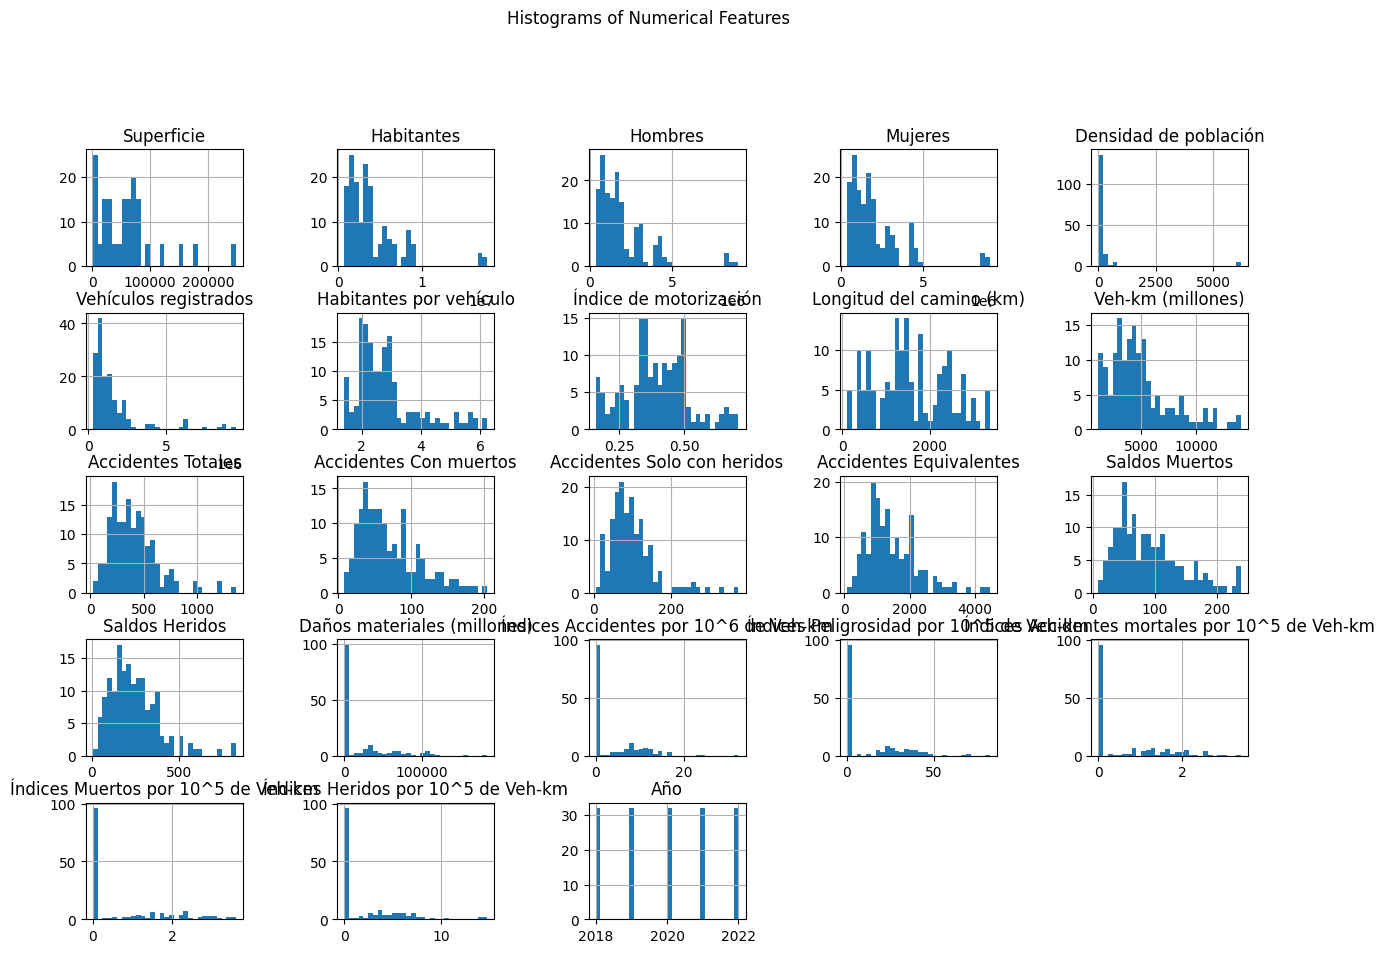

In [107]:
df_copy.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.subplots_adjust(hspace=0.4, wspace=0.6)  

Since most of the values seem to be severly skewed i will proceed to print the skew of each numeric feature excluding year. 

In [108]:
numeric_columns = df_copy.select_dtypes(include=['float64', 'int64']).drop(columns = ['Año'])
skew_values = numeric_columns.skew()
print(skew_values)


Superficie                                        1.658198
Habitantes                                        2.261982
Hombres                                           2.282254
Mujeres                                           2.263493
Densidad de población                             5.272650
Vehículos registrados                             2.812966
Habitantes por vehículo                           1.424870
Índice de motorización                            0.232760
Longitud del camino (km)                          0.224910
Veh-km (millones)                                 1.240044
Accidentes Totales                                1.382446
Accidentes Con muertos                            0.965036
Accidentes Solo con heridos                       1.831771
Accidentes Equivalentes                           1.177043
Saldos Muertos                                    0.893292
Saldos Heridos                                    1.312677
Daños materiales (millones)                       1.7881

As seen in the distributions  the columns of the dataset are positively skewed and for that a log transformation will bw applied in feature engenieering.

## Feature engineering

Since some absolute values can be misleading when comparing regions with different pipulation sizes i wil be creating some ratios to standardize the data this way allowing fare comparison between regions.  
This also helps for identifying trends between regions.  
For this reasons i will create a Accidents per capita and a Vehicles per capita features allowing to identify the regions  where residents are at a higher risk of being involved in accidents and the level of motorization.

In [109]:
df_copy['Accidents Per Capita'] = df_copy['Accidentes Totales'] / df_copy['Habitantes']
df_copy['Vehicles Per Capita'] = df_copy['Vehículos registrados'] / df_copy['Habitantes']
numeric_columns = df_copy.select_dtypes(include=['float64', 'int64']).drop(columns = ['Año'])
df_copy[['Accidents Per Capita', 'Vehicles Per Capita']]



,Accidents Per Capita,Vehicles Per Capita
0,0.000152,0.438401
1,0.000135,0.492457
2,0.000254,0.662024
3,0.000200,0.336502
4,0.000076,0.288375
...,...,...
155,0.000218,0.386993
156,0.000288,0.415257
157,0.000138,0.268643
158,0.000129,0.430891


As it was mentioned in the EDA section the columns with a high skew (1.5) are transformed with a log transformation.

In [110]:
skew_values = numeric_columns.skew()
high_skew = skew_values[skew_values > 1.5].index
for feature in high_skew:
    df_copy[feature] = np.log1p(df_copy[feature])  


With this transformation the skew in the dataset features is heaviliy reduced for our modeling.

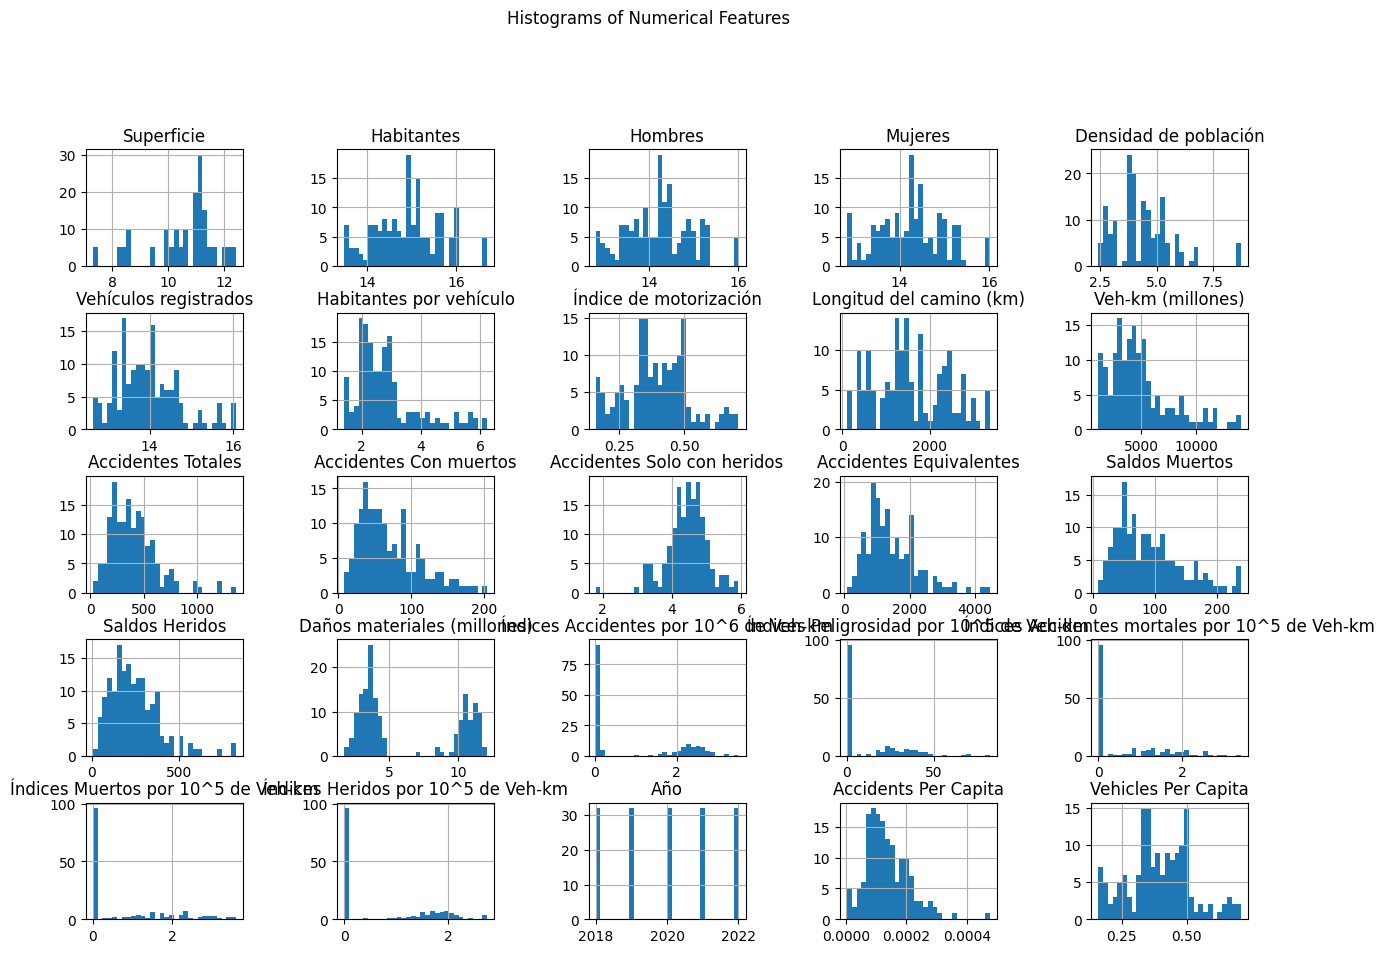

In [111]:
df_copy.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.subplots_adjust(hspace=0.4, wspace=0.6)  

In [112]:
numeric_columns = df_copy.select_dtypes(include=['float64', 'int64']).drop(columns = ['Año'])
skew_values = numeric_columns.skew()
print(skew_values)

Superficie                                       -1.003703
Habitantes                                        0.107462
Hombres                                           0.119988
Mujeres                                           0.112207
Densidad de población                             1.115272
Vehículos registrados                             0.765874
Habitantes por vehículo                           1.424870
Índice de motorización                            0.232760
Longitud del camino (km)                          0.224910
Veh-km (millones)                                 1.240044
Accidentes Totales                                1.382446
Accidentes Con muertos                            0.965036
Accidentes Solo con heridos                      -0.643490
Accidentes Equivalentes                           1.177043
Saldos Muertos                                    0.893292
Saldos Heridos                                    1.312677
Daños materiales (millones)                       0.4168

Followint the transformation the features are normalized to ensure equal weighting in dimensionality reduction and clustering utilizing sklearn's StandardScaler.

In [113]:
scaler = StandardScaler()
numeric_features = df_copy.select_dtypes(include=['float64', 'int64']).columns
df_copy[numeric_features] = scaler.fit_transform(df_copy[numeric_features])


Finally a subset without the year and region columns will be created to be able to realize the PCA with the relevant features.

In [114]:
model_df = df_copy.drop(['Entidad', 'Año'], axis=1)  # Drop irrelevant columns

In [115]:
model_df.head()

,Superficie,Habitantes,Hombres,Mujeres,Densidad de población,Vehículos registrados,Habitantes por vehículo,Índice de motorización,Longitud del camino (km),Veh-km (millones),...,Saldos Muertos,Saldos Heridos,Daños materiales (millones),Índices Accidentes por 10^6 de Veh-km,Índices Peligrosidad por 10^5 de Veh-km,Índices Accidentes mortales por 10^5 de Veh-km,Índices Muertos por 10^5 de Veh-km,Índices Heridos por 10^5 de Veh-km,Accidents Per Capita,Vehicles Per Capita
0,-1.624044,-1.073007,-1.091077,-1.066893,0.868053,-0.833457,-0.514606,0.349815,-1.413323,-1.047961,...,-0.978624,-0.360935,-0.978268,-0.770206,-0.702404,-0.704944,-0.712943,-0.771662,0.215260,0.352974
1,0.543585,0.202218,0.213343,0.183109,-0.386127,0.560549,-0.748638,0.792398,0.345081,-0.267767,...,0.408889,-0.038233,-0.798093,-0.767044,-0.704916,-0.704944,-0.712024,-0.776041,-0.011891,0.795898
2,0.571674,-1.890425,-1.869136,-1.925499,-1.545027,-1.075663,-1.235423,2.185714,-0.283943,-0.888524,...,-0.598484,-0.683637,-1.039425,-0.792662,-0.706827,-0.704944,-0.712024,-0.776041,1.629426,2.185278
3,0.360648,-1.578342,-1.595141,-1.574693,-1.200137,-1.678216,0.132257,-0.477979,-0.337139,-1.099801,...,-0.807561,-1.167690,-0.978187,-0.770998,-0.706499,-0.704944,-0.712024,-0.777139,0.874190,-0.481952
4,1.182781,0.040792,0.048452,0.024682,-1.043798,-0.312403,0.596576,-0.879582,0.466782,0.355243,...,-0.294371,-0.634530,-0.888237,-0.828304,-0.717258,-0.706101,-0.713862,-0.779337,-0.830163,-0.876296


## Modeling

The modeling is started with PCA to obtain 5 primary componets and to see which features contribute the most to each component.  
This allows to infer wich component better represents the "safety indexes" and thus deduce which are the contributeing factor in this indexes.

### PCA

In [117]:
pca = PCA(n_components=0.9)  # Retain 90% of variance
pca_components = pca.fit_transform(model_df)


In [118]:
pca.explained_variance_ratio_

array([0.36975281, 0.24843463, 0.15430659, 0.08817322, 0.07830788])

In [119]:
# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)


[0.36975281 0.61818744 0.77249402 0.86066725 0.93897513]


In [120]:
pca.components_

array([[ 1.23213182e-01,  2.83314622e-01,  2.84472137e-01,
         2.82715471e-01,  4.60155224e-02,  2.27285926e-01,
         1.02235864e-01, -1.07859362e-01,  2.05273616e-01,
         2.95298560e-01,  2.81542307e-01,  3.01129806e-01,
         2.50060611e-01,  3.09555170e-01,  3.03926902e-01,
         2.87354263e-01,  7.13066541e-02,  1.18612508e-02,
         6.09686908e-03,  8.85330304e-03,  2.00228791e-02,
         1.77409313e-02, -1.32519801e-01, -1.07871494e-01],
       [ 4.48750037e-03, -7.98121369e-02, -7.59784548e-02,
        -8.61017725e-02, -4.92462289e-02, -8.23744939e-02,
         4.65594411e-03, -1.79626327e-02, -2.09365560e-02,
        -4.21587893e-02,  9.95599523e-02,  1.67089857e-02,
         6.08487031e-02,  4.56978993e-02,  1.77947209e-02,
         2.68445108e-02,  3.65754645e-01,  3.91935933e-01,
         3.99884665e-01,  3.93709984e-01,  3.93042775e-01,
         3.96175602e-01,  1.93832728e-01, -1.78592526e-02],
       [-2.66179303e-01,  1.89161828e-01,  1.88826528e

In [121]:
# Number of components that explain 90% variance
n_components_used = np.argmax(cumulative_variance >= 0.9) + 1
print(f"Number of components used to explain 90% variance: {n_components_used}")


Number of components used to explain 90% variance: 5


In [122]:

# Getting the loadings for each principal component and putting them in a DataFrame
pca_loadings = pd.DataFrame(pca.components_, columns=model_df.columns)

# Display the loadings for each component
pca_loadings


,Superficie,Habitantes,Hombres,Mujeres,Densidad de población,Vehículos registrados,Habitantes por vehículo,Índice de motorización,Longitud del camino (km),Veh-km (millones),...,Saldos Muertos,Saldos Heridos,Daños materiales (millones),Índices Accidentes por 10^6 de Veh-km,Índices Peligrosidad por 10^5 de Veh-km,Índices Accidentes mortales por 10^5 de Veh-km,Índices Muertos por 10^5 de Veh-km,Índices Heridos por 10^5 de Veh-km,Accidents Per Capita,Vehicles Per Capita
0,0.123213,0.283315,0.284472,0.282715,0.046016,0.227286,0.102236,-0.107859,0.205274,0.295299,...,0.303927,0.287354,0.071307,0.011861,0.006097,0.008853,0.020023,0.017741,-0.132520,-0.107871
1,0.004488,-0.079812,-0.075978,-0.086102,-0.049246,-0.082374,0.004656,-0.017963,-0.020937,-0.042159,...,0.017795,0.026845,0.365755,0.391936,0.399885,0.393710,0.393043,0.396176,0.193833,-0.017859
2,-0.266179,0.189162,0.188827,0.186514,0.349144,0.352366,-0.339573,0.398033,-0.202152,0.077694,...,-0.036918,-0.088611,0.086594,0.083705,0.054176,0.065311,0.052897,0.073865,-0.168117,0.397986
3,-0.289021,0.186033,0.182159,0.188743,0.364900,-0.007139,0.444760,-0.368868,-0.161384,-0.044878,...,-0.156137,-0.173994,0.067898,0.080791,0.032739,0.015834,0.029577,0.038310,-0.155155,-0.368900
4,0.459360,0.133199,0.134856,0.128895,-0.339765,0.127454,0.030319,0.020274,0.382441,-0.000153,...,-0.134620,-0.206070,0.141243,0.084535,0.014015,0.042742,0.068718,0.095473,-0.428155,0.020549


In [123]:
# Projecting the data onto the principal components
pca_transformed_data = pca.transform(model_df)

# Convert the transformed data into a DataFrame for easier analysis
pca_transformed_df = pd.DataFrame(pca_transformed_data, columns=[f'PC{i+1}' for i in range(pca_transformed_data.shape[1])])

# Display the first few rows of the transformed data
pca_transformed_df.head()


,PC1,PC2,PC3,PC4,PC5
0,-3.245478,-1.572755,0.278911,0.176296,-1.923056
1,0.503201,-1.764069,0.409409,-1.602399,0.012318
2,-4.296427,-1.132310,-0.332881,-3.800079,-0.438650
3,-4.206019,-1.317774,-2.325177,-0.193951,0.239756
4,-0.365529,-2.028889,-1.722608,0.419264,1.626893


In [145]:
# Define the correct list of safety indices columns
safety_indices_columns = [
    'Índices Accidentes mortales por 10^5 de Veh-km', 
    'Índices Muertos por 10^5 de Veh-km', 
    'Índices Heridos por 10^5 de Veh-km',
    'Índices Accidentes por 10^6 de Veh-km',
    'Índices Peligrosidad por 10^5 de Veh-km'
]

# Combine the PCA-transformed data with the original model_df (which contains the safety indices)
combined_df = pd.concat([model_df[safety_indices_columns], pca_transformed_df], axis=1)

# Compute the correlations between the principal components and safety indices
correlations = combined_df.corr().iloc[:len(safety_indices_columns), len(safety_indices_columns):]

# Display the correlations
correlations



,PC1,PC2,PC3,PC4,PC5
Índices Accidentes mortales por 10^5 de Veh-km,0.026373,0.961365,0.125685,0.023034,0.058595
Índices Muertos por 10^5 de Veh-km,0.059647,0.959735,0.101795,0.043026,0.094206
Índices Heridos por 10^5 de Veh-km,0.052849,0.967385,0.142146,0.055730,0.130885
Índices Accidentes por 10^6 de Veh-km,0.035334,0.957033,0.161082,0.117527,0.115890
Índices Peligrosidad por 10^5 de Veh-km,0.018162,0.976442,0.104256,0.047626,0.019213


In [146]:
loadings = pca.components_

# Create a DataFrame with the loadings for better readability
loadings_df = pd.DataFrame(loadings, columns=model_df.columns)

# Get the loadings for PC2 (second principal component)
pc2_loadings = loadings_df.iloc[1].abs()

# Sort the loadings in descending order to find the most important features
sorted_pc2_loadings = pc2_loadings.sort_values(ascending=False)

# Display the top features contributing to PC2
print("Top features contributing to PC2:")
sorted_pc2_loadings.head(10) 

Top features contributing to PC2:


Índices Peligrosidad por 10^5 de Veh-km           0.399885
Índices Heridos por 10^5 de Veh-km                0.396176
Índices Accidentes mortales por 10^5 de Veh-km    0.393710
Índices Muertos por 10^5 de Veh-km                0.393043
Índices Accidentes por 10^6 de Veh-km             0.391936
Daños materiales (millones)                       0.365755
Accidents Per Capita                              0.193833
Accidentes Totales                                0.099560
Mujeres                                           0.086102
Vehículos registrados                             0.082374
Name: 1, dtype: float64

In [147]:
# Extract PC2 from the PCA transformed data
pc2_data = pca_transformed_df['PC2']

# Define the safety indices columns
safety_indices_columns = [
    'Índices Accidentes mortales por 10^5 de Veh-km', 
    'Índices Muertos por 10^5 de Veh-km', 
    'Índices Heridos por 10^5 de Veh-km',
    'Índices Accidentes por 10^6 de Veh-km',
    'Índices Peligrosidad por 10^5 de Veh-km'
]

# Compute the correlation between PC2 and each safety index
correlation_with_pc2 = model_df[safety_indices_columns].apply(lambda x: x.corr(pc2_data))

# Display the results
correlation_with_pc2


Índices Accidentes mortales por 10^5 de Veh-km    0.961365
Índices Muertos por 10^5 de Veh-km                0.959735
Índices Heridos por 10^5 de Veh-km                0.967385
Índices Accidentes por 10^6 de Veh-km             0.957033
Índices Peligrosidad por 10^5 de Veh-km           0.976442
dtype: float64

### Clustering

In [127]:
grouped_data = df_copy.groupby(['Entidad', 'Año']).mean()
safety_data = grouped_data[safety_indices_columns]  # Focus on safety indices
safety_data

Índices Accidentes mortales por 10^5 de Veh-km  \
Entidad        Año                                                         
Aguascalientes -1.414214                                       -0.704944   
               -0.707107                                       -0.704944   
                0.000000                                       -0.704018   
                0.707107                                        2.765588   
                1.414214                                        2.418303   
...                                                                  ...   
Zacatecas      -1.414214                                       -0.704944   
               -0.707107                                       -0.703786   
                0.000000                                       -0.704018   
                0.707107                                        2.649827   
                1.414214                                        0.566118   

                          Índices Muertos por 10^5 de Veh-km  \
Entidad        Año                                             
Aguascalientes -1.414214                           -0.712943   
               -0.707107                           -0.712024   
                0.000000                           -0.711749   
                0.707107                            2.408663   
                1.414214                            2.133065   
...                                                      ...   
Zacatecas      -1.414214                           -0.712024   
               -0.707107                           -0.712024   
                0.000000                           -0.711933   
                0.707107                            2.500529   
                1.414214                            0.663209   

                          Índices Heridos por 10^5 de Veh-km  \
Entidad        Año                                             
Aguascalientes -1.414214                           -0.771662   
               -0.707107                           -0.766212   
                0.000000                           -0.769260   
                0.707107                            2.256376   
                1.414214                            2.191225   
...                                                      ...   
Zacatecas      -1.414214                           -0.770569   
               -0.707107                           -0.768388   
                0.000000                           -0.772536   
                0.707107                            1.922356   
                1.414214                            1.441062   

                          Índices Accidentes por 10^6 de Veh-km  \
Entidad        Año                                                
Aguascalientes -1.414214                              -0.770206   
               -0.707107                              -0.736797   
                0.000000                              -0.736035   
                0.707107                               1.671629   
                1.414214                               1.949346   
...                                                         ...   
Zacatecas      -1.414214                              -0.763893   
               -0.707107                              -0.775766   
                0.000000                              -0.778160   
                0.707107                               1.503133   
                1.414214                               1.109400   

                          Índices Peligrosidad por 10^5 de Veh-km  
Entidad        Año                                                 
Aguascalientes -1.414214                                -0.702404  
               -0.707107                                -0.691318  
                0.000000                                -0.693994  
                0.707107                                 2.899536  
                1.414214                                 3.079748  
...                    

### Kmeans

In [128]:
# Finding optimal number of clusters with elbow method
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(safety_data)
    wcss.append(kmeans.inertia_) 


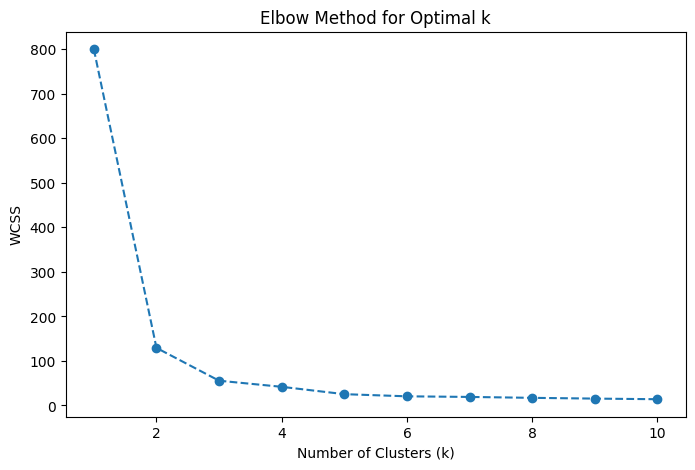

In [129]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


In [130]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(safety_data)
grouped_data['KMeans_Cluster'] = kmeans_labels

In [131]:
kmeans_cluster_analysis = pd.DataFrame(kmeans.cluster_centers_, columns=safety_data.columns)
kmeans_cluster_analysis

,Índices Accidentes mortales por 10^5 de Veh-km,Índices Muertos por 10^5 de Veh-km,Índices Heridos por 10^5 de Veh-km,Índices Accidentes por 10^6 de Veh-km,Índices Peligrosidad por 10^5 de Veh-km
0,0.532071,0.571343,0.928224,1.049299,0.603363
1,-0.695991,-0.704553,-0.762603,-0.772845,-0.701753
2,1.789883,1.772163,1.541979,1.430810,1.723480


### DBSCAN

In [139]:
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan_labels = dbscan.fit_predict(safety_data)
grouped_data['DBSCAN_Cluster'] = dbscan_labels

In [140]:
dbscan_cluster_analysis = grouped_data.groupby('DBSCAN_Cluster').mean()
dbscan_cluster_analysis

,Superficie,Habitantes,Hombres,Mujeres,Densidad de población,Vehículos registrados,Habitantes por vehículo,Índice de motorización,Longitud del camino (km),Veh-km (millones),...,Daños materiales (millones),Índices Accidentes por 10^6 de Veh-km,Índices Peligrosidad por 10^5 de Veh-km,Índices Accidentes mortales por 10^5 de Veh-km,Índices Muertos por 10^5 de Veh-km,Índices Heridos por 10^5 de Veh-km,Accidents Per Capita,Vehicles Per Capita,KMeans_Cluster,Agglomerative_Cluster
DBSCAN_Cluster,,,,,,,,,,,,,,,,,,,,,
-1,-3.097181e-01,-0.326333,-0.329878,-0.333001,0.097859,-0.277347,-0.006582,0.174113,-0.373561,-0.571908,...,1.052797,1.350364,1.612798,1.513916,1.472778,1.349128,0.622043,0.174176,1.500000,1.6875
0,1.272131e-17,-0.021008,-0.027643,-0.008317,-0.011639,-0.036003,0.029371,-0.039494,0.006360,-0.023557,...,-0.799211,-0.792433,-0.709143,-0.705403,-0.712953,-0.776422,-0.134857,-0.039730,1.000000,1.0000
1,1.032394e-01,0.150793,0.165245,0.127635,-0.009341,0.164455,-0.056548,0.020951,0.111801,0.237751,...,1.247490,1.134744,0.880688,0.906168,0.934979,1.103134,0.062367,0.021402,0.708333,0.5000


### Agglomerative Clustering

In [143]:
# Step 4: Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_labels = agglo.fit_predict(safety_data)
grouped_data['Agglomerative_Cluster'] = agglo_labels

### Results

In [135]:
cluster_evolution = grouped_data.groupby(['Entidad', 'KMeans_Cluster']).size().unstack(fill_value=0)



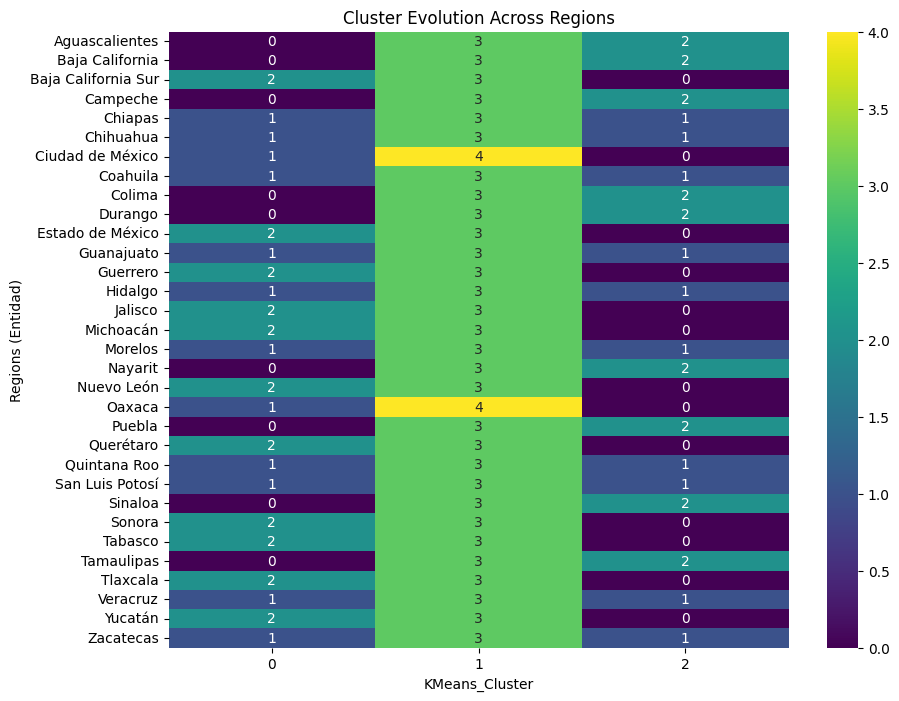

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cluster_evolution, annot=True, fmt="d", cmap="viridis")
plt.title("Cluster Evolution Across Regions")
plt.xlabel("KMeans_Cluster")
plt.ylabel("Regions (Entidad)")
plt.show()


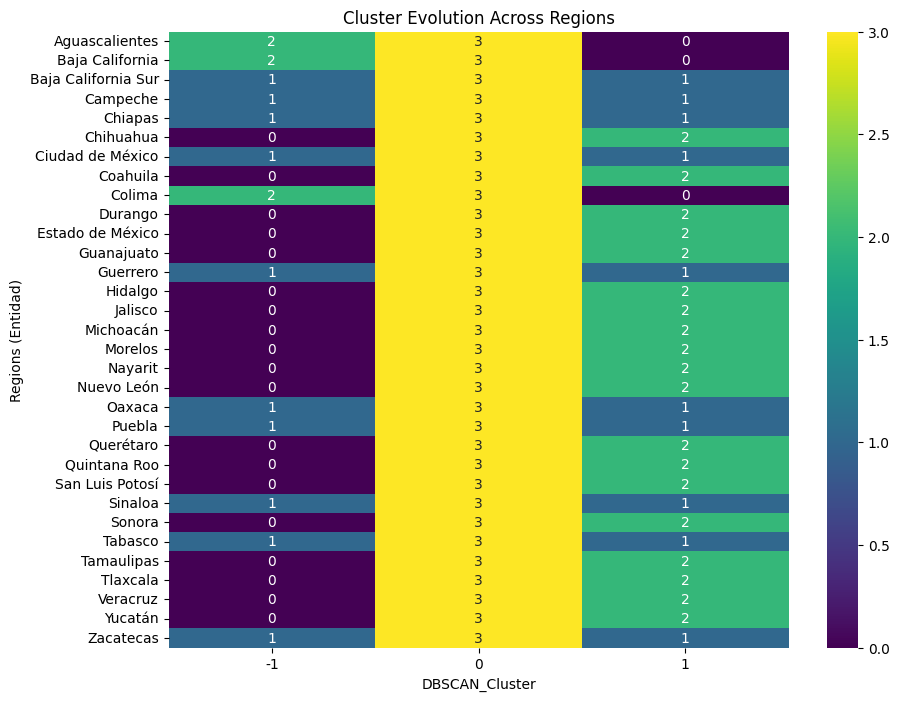

In [141]:
cluster_evolution = grouped_data.groupby(['Entidad', 'DBSCAN_Cluster']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(cluster_evolution, annot=True, fmt="d", cmap="viridis")
plt.title("Cluster Evolution Across Regions")
plt.xlabel("DBSCAN_Cluster")
plt.ylabel("Regions (Entidad)")
plt.show()

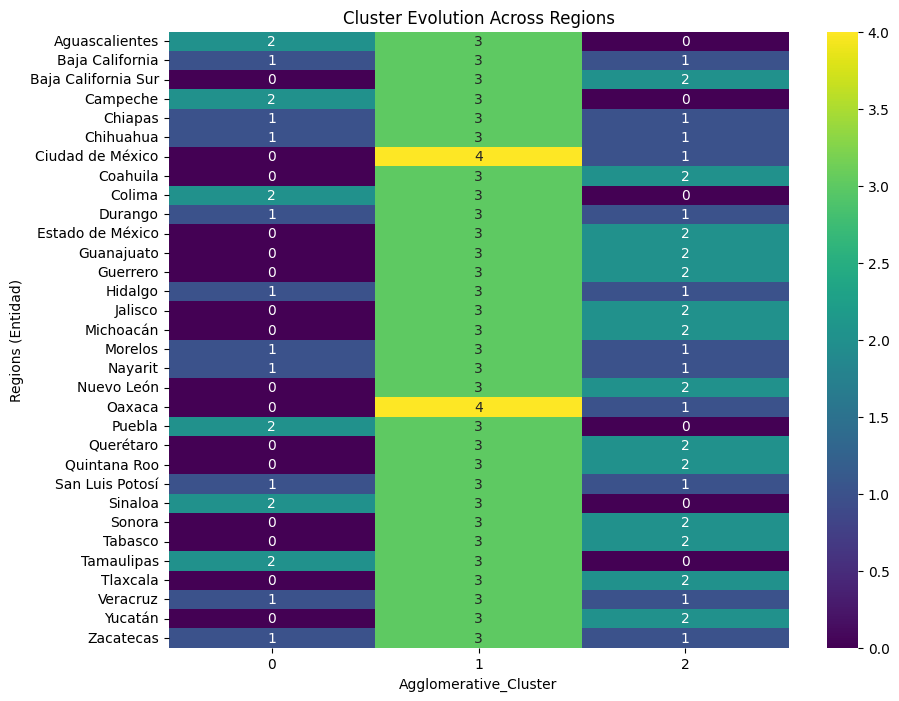

In [144]:
cluster_evolution = grouped_data.groupby(['Entidad', 'Agglomerative_Cluster']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 8))
sns.heatmap(cluster_evolution, annot=True, fmt="d", cmap="viridis")
plt.title("Cluster Evolution Across Regions")
plt.xlabel("Agglomerative_Cluster")
plt.ylabel("Regions (Entidad)")
plt.show()

## Model Recomendation

## Key Findings and Insights

## Next Steps